In [210]:
import matplotlib.pyplot as plt
import os
from pathlib import Path
from enum import Enum
from tensorboard.backend.event_processing.event_file_loader import EventFileLoader

In [211]:
PATHS = {
        "working_dir": "./python/basic_rl_env",
        "results_dir": "../basic_rl_env/results/",
        "results_archive_dir": "../basic_rl_env/results_archive/"
    }

In [212]:

all_runs = {}
for file in os.listdir(Path(PATHS["results_dir"]).absolute()):
    all_runs[file.split("_")[0]] = Path(PATHS["results_dir"]+file).absolute()
for file in os.listdir(Path(PATHS["results_archive_dir"]).absolute()):
    all_runs[file.split("_")[0]] = Path(PATHS["results_archive_dir"]+file).absolute()

In [213]:
class Tag(Enum):
    CUMULATIVE_REWARD = "Environment/Cumulative Reward"
    EP_LENGTH = "Environment/Episode Length"

Select from what run to get data. Also choose the Type of data.

In [214]:
selected_run = 1195
selected_tag = Tag.EP_LENGTH

In [215]:
# Get the tfevents file associated with the current run.
path_to_result_folder = all_runs[str(selected_run)] / "RollerAgent/"
path_to_result = sorted(Path(path_to_result_folder).glob("events.out.tfevents.*"))[0]

y_values = []
for event in EventFileLoader(str(path_to_result)).Load():
    # event = event_pb2.Event.FromString(batch.numpy())
    for value in event.summary.value:
        if value.tag == selected_tag.value:
            y_values.append(value.tensor.float_val[0])

#y_values = y_values[::10]

In [216]:
x_values = [10000 * i for i in range(len(y_values))]

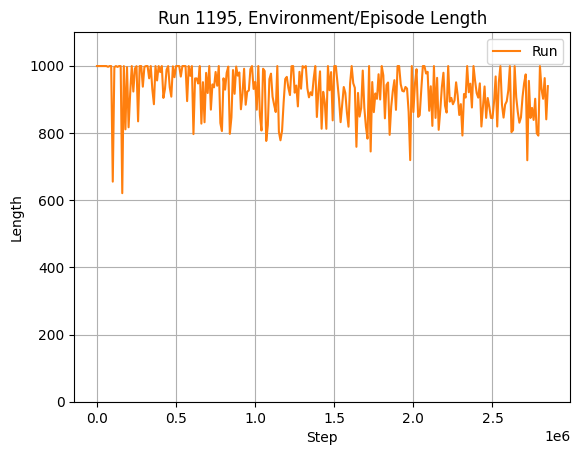

In [217]:
plt.plot(x_values, y_values ,label="Run", color="C1")
#plt.hlines(1.5, x_values[0], x_values[-1], label="Expected reward limit = 1.5", color="C2")
plt.title(f"Run {selected_run}, {selected_tag.value}")
plt.xlabel("Step")
plt.ylabel("Length")
plt.ylim(0, 1100)
plt.legend()
plt.grid()

plt.savefig(f"{selected_run}_{selected_tag}.pdf")